In [1]:
# Ensure the module is automatically reloaded when rerunning the import command.
# %load_ext autoreload
# %autoreload 2

In [1]:
import pof_piv as piv
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from natsort import natsorted
from natsort import index_natsorted
import scipy.signal as sig
from tqdm import trange
from tqdm import tqdm

In [3]:
directory = 'PIVimages/tracerDensity/'
file_prefix = None
file_type = 'png'

images_sets, set_names = piv.read_image_sets(directory, file_prefix, file_type, grouping=True)

11
['0.01', '0.1', '0.5', '0.25', '1', '8', '16', '24', '64', '128', '256']


In [9]:
# Test the simple PIV function to see at which window size it gives an error about multiple maxima.

min_window_size = []
for i in range(len(images_sets)):
    for window_size in [1024, 512, 256, 128, 64, 32, 16, 8]:
        try:
            u, v = piv.simple_piv(images_sets[i], window_size, plot=False)
        except:
            min_window_size.append(window_size * 2)
            break

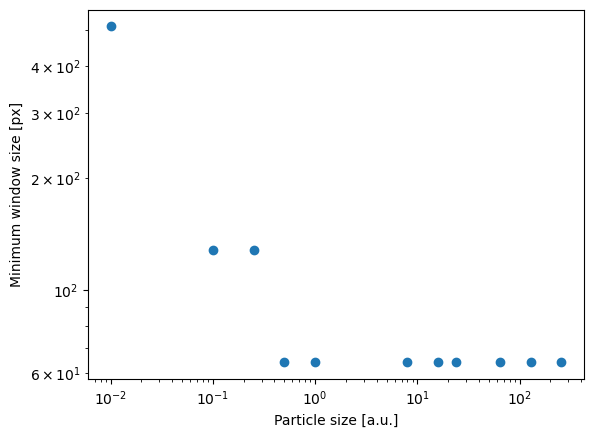

In [13]:
# Convert the names to floats
particle_size = [float(i) for i in set_names]

# Make a log-log plot of the particle size vs the minimum window size
fig, ax = plt.subplots()
ax.plot(particle_size, min_window_size, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Tracer density [a.u.]')
ax.set_ylabel('Minimum window size [px]')
plt.show()

In [2]:
directory = 'PIVimages/tracerDisplacement/'
file_prefix = None
file_type = 'png'

images_sets, set_names = piv.read_image_sets(directory, file_prefix, file_type, grouping=True)

10
['0.1', '0.5', '0.25', '1', '2', '4', '8', '16', '32', '64']


/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:111: RuntimeWarning: divide by zero encountered in log
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))
/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:111: RuntimeWarning: invalid value encountered in scalar subtract
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))
/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:112: RuntimeWarning: divide by zero encountered in log
  / ((np.log(neighbor[0])) + np.log(neighbor[2]) -
/Users/tommieverouden/PycharmProjects/ETPoF/pof_piv/pof_piv/helper_functions.py:111: RuntimeWarning: invalid value encountered in scalar divide
  correction = [(0.5 * (np.log(neighbor[0]) - np.log(neighbor[2]))


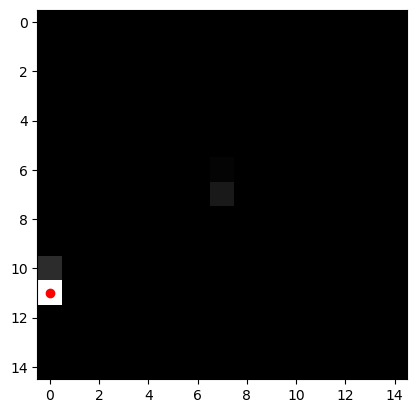

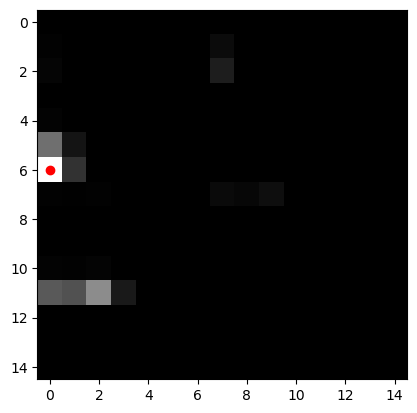

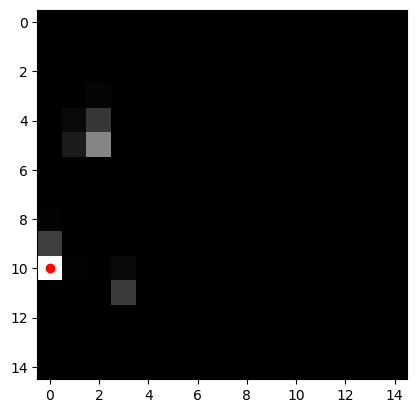

Peak is at the edge of the correlation array
Peak is at the edge of the correlation array
Peak is at the edge of the correlation array
Peak is at the edge of the correlation array


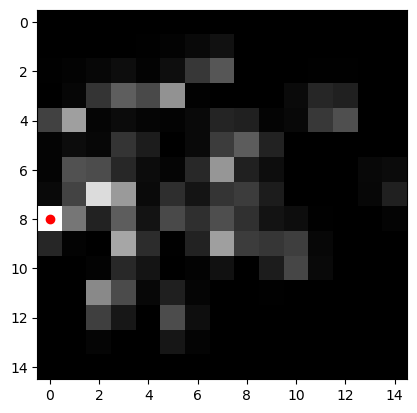

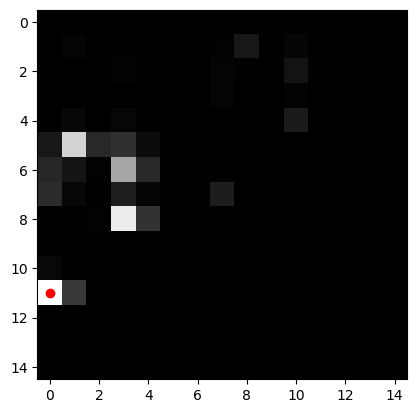

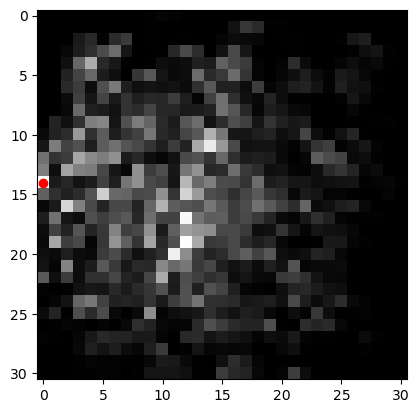

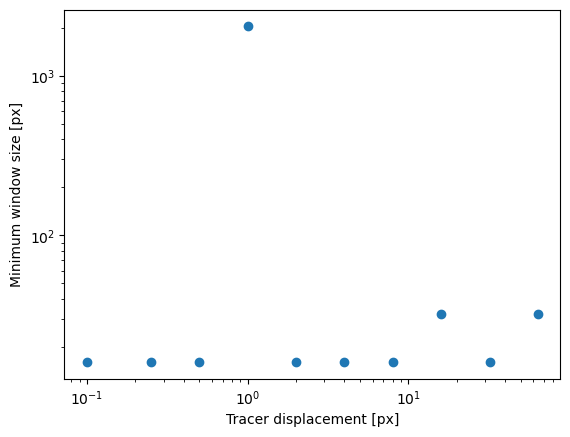

In [3]:
# Test the simple PIV function to see at which window size it gives an error about multiple maxima.

min_window_size = []
for i in range(len(images_sets)):
    for window_size in [1024, 512, 256, 128, 64, 32, 16, 8]:
        try:
            u, v = piv.simple_piv(images_sets[i], window_size, plot=False)
        except:
            min_window_size.append(window_size * 2)
            break
# Convert the names to floats
particle_size = [float(i) for i in set_names]

# Make a log-log plot of the particle size vs the minimum window size
fig, ax = plt.subplots()
ax.plot(particle_size, min_window_size, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Tracer displacement [px]')
ax.set_ylabel('Minimum window size [px]')
plt.show()